# STOR 320: Introduction to Data Science
## Spring 2025
## Final Paper Group 13

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction


In NYC, public transit is a fact of life, in particular, the MTA or Metro Transit Authority subways.  But, not everyone uses the MTA exclusively.  Some drive, and some use a combination of the two depending on their mood, the weather, or even an accident on the road, causing fluctuations in ridership depending on the day.  For our project we decided to explore the relationships between MTA ridership, weather, and accidents in NYC over a six-month period in 2020.  We hypothesized that weather conditions would affect the number of accidents and overall ridership of the MTA, and that ridership would be indicative of the number of accidents occurring in an area.  We also looked into the number of subway stations per borough and per square mile to analyze the density of stations in relation to ridership and accidents, the severity of accidents, and causes of accidents, particularly alcohol-related, as well as a myriad of other factors.  After performing initial assessments looking at the variation between different variables across the weather, ridership, and accident datasets, we arrived at two machine-learning questions to predict target variables within two of our datasets based on features from all three datasets.

Our first question was: can we predict alcohol-related crashes based on time of day, day of the week, borough, type of vehicle, and the severity of the crash?  One of the variables in our dataset was contributing factors, of which one was alcohol involvement.  We theorized that crashes with alcohol involvement would be more prevalent on days on weekends and nights.  This was reasoned primarily through the normal social acceptability of drinking at night, but also through an article by Tim Balk which polled New Yorkers and found that 78% of New Yorkers felt unsafe riding the subway after dark, a 24% rise since 2017 (Balk 2024).  Since many New Yorkers don’t feel safe at night on the subway, it seemed reasonable they might likely make a choice to drink and drive rather than riding it.  As for applications of this knowledge, knowing whether or not crashes were more likely to be alcohol-related based on other conditions, and the areas where they are more likely to occur would allow key stakeholders to engage in campaigns against drunk driving and direct more resources to public transportation during times when conditions were more likely to lead to alcohol-related accidents.  

Our second question was: can we predict whether a subway day is a high ridership day (defined as above the median ridership) using daily accident counts and weather conditions?  In other words, can a classification model accurately predict high vs. low ridership days using the following variables of accident count, temperature, precipitation, and humidity?  Similar to the above question, knowing the types of days when MTA ridership would be higher could allow the city to direct more resources to the MTA during those times, or divert during days when ridership would be lower.  By more accurately predicting ridership and having fluctuating staff and resources based upon the predicted ridership, the MTA could better distribute their resources and have a tighter overall budget while still meeting the needs of the city.  It would also allow the city to better predict potential revenue that comes from MTA ridership.

Our assumption was that although these models were trained on NYC-specific data, they would be applicable to other metropolitan areas using similar data.  We also would like to note that the data collected for this period may have been affected by the COVID-19 pandemic which began in March 2020 and the ensuing response.  Therefore, although we think these models are useful, they would be more refined should the data have come from a different time period.


## Data
Our project incorporates data from three different datasets that contain information about the weather conditions in New York City, the usage of various public transportation modes, and the factors surrounding car accidents in the city. The weather data was collected by the Laguardia Airport Weather Station, part of the National Weather Service, and scraped from the website Weather Underground. It includes detailed daily weather reports from January 1, 2020 to December 31, 2020. The public transportation data was collected by the Metropolitan Transportation Authority (MTA) and accessed via Maven Analytics. It covers daily ridership statistics across various transit modes from March 1, 2020, to December 31, 2020. The car accident data was collected by the New York City Police Department and made available through NYC Open Data. This dataset includes a detailed record of all traffic collisions reported in the city from January 1, 2020 through August 29, 2020. 

Each entry in our datasets represents something different depending on the context of the data. In the weather dataset, each observation represents a single day’s weather in 2020 in New York City, totaling 365 entries. In the MTA dataset, each observation represents one day of ridership data, with 306 observations spanning the specified period of March, 2020 to December, 2020. In the car accident data set, each entry represents an individual collision and the dataset initially had roughly 75,000 observations. Throughout all of our datasets the population of our analysis is the city of New York, and our analysis focuses on the overlapping time frame between our datasets–March, 2020 to August, 2020.

The weather dataset describes a variety of weather factors reported for each day that we investigated before narrowing it down to focus on the variables, Temperature (°F) Avg, Precipitation (in) Total, Humidity (%) Avg, and Date. We researched different factors to provide context to the data, one source being the American Meteorological Society to contextualize the severity of precipitation levels (American Meteorological Society). To prepare the data for further analysis, the date column was converted to a pandas datetime object, and the data was aggregated by day. To ensure only one entry existed for the same day, temperature and humidity values were averaged, and precipitation values were summed to ensure a single, consistent record per day.

From the MTA dataset, we focused on the variables Date and Subways: Total Estimated Ridership, filtering out other transportation modes. This choice was based on the subway’s broad accessibility and consistency throughout New York, while others are only applicable to specific areas of the city. To prepare the MTA data to be merged with the other datasets, the date column was converted to a pandas datetime object and it was confirmed that no missing data was present. As shown in the scatterplot below, there is a general positive relationship between average temperature and estimated subway ridership, one of the supporting reasons we selected these variables for further analysis.

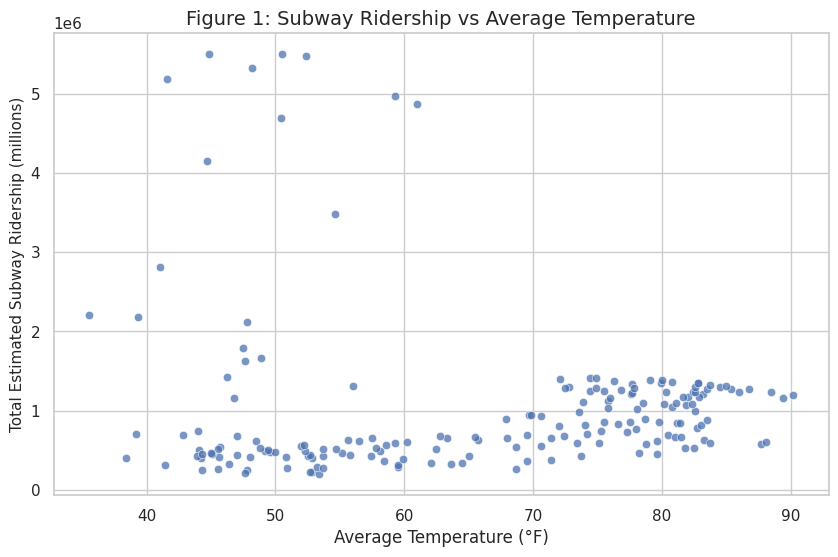

In [124]:
# Code for Figure 1 in the Data Section of the Final Paper
# import dataframes 
weather = pd.read_csv('NYC_weather_data_Jan-Aug2020.csv')
ridership = pd.read_csv('MTA_Daily_Ridership.csv')
merged = pd.merge(ridership, weather, on='Date', how='inner')
merged['Date'] = pd.to_datetime(merged['Date'])
merged.set_index('Date', inplace=True)

#temperature vs estimated ridership
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°F) Avg', y='Subways: Total Estimated Ridership', data=merged, alpha=0.75)
plt.title('Figure 1: Subway Ridership vs Average Temperature', fontsize=14)
plt.xlabel('Average Temperature (°F)', fontsize=12)
plt.ylabel('Total Estimated Subway Ridership (millions)', fontsize=11)
plt.grid(True)
plt.show();

The accident dataset originally included a wide range of conditions describing each collision, but we limited our focus to Crash Date, Crash Time, Borough, Number of Persons Injured, and Contributing Factor Vehicle 1-5. The table below shows a preview of the final accident dataset used throughout our analysis, including only the most important columns for our focus. These variables give information on the neighborhood where the crash took place, the severity of the crash, and the reason behind the accident. As part of the cleaning process, we removed observations that lacked a reported borough and standardized the Crash Date field to a pandas datetime object. This step ensured consistency across datasets when merging on the date variable.

In [88]:
# Code for Figure 2 in the Data Section of the Final Paper
# Table of all variables 
mta = pd.read_csv('MTA_Daily_Ridership.csv')
wth = pd.read_csv('NYC_weather_data_Jan-Aug2020.csv')
car = pd.read_csv('NYC Accidents 2020.csv')

# only variables of interest 
mta_clean = mta[['Date', 'Subways: Total Estimated Ridership']].copy()
wth_clean = wth[['Temperature (°F) Avg', 'Precipitation (in) Total', 'Humidity (%) Avg', 'Date']].copy()
car_clean = car[['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 
'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 
'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']].copy()

# change date columns to datatime 
car_clean['CRASH DATE'] = pd.to_datetime(car_clean['CRASH DATE'])
wth_clean['Date'] = pd.to_datetime(wth_clean['Date'])
mta_clean['Date'] = pd.to_datetime(mta_clean['Date'])

# check for daily weather 
daily_weather = wth_clean.groupby(wth_clean['Date'].dt.date).agg({
    'Temperature (°F) Avg': 'mean',
    'Precipitation (in) Total': 'sum',
    'Humidity (%) Avg': 'mean'
}).reset_index()
daily_weather['Date'] = pd.to_datetime(daily_weather['Date'])

#change name of date column for car 
car_clean['Date'] = pd.to_datetime(car_clean['CRASH DATE'])
car_clean.drop('CRASH DATE', axis=1, inplace=True)
car_clean = car_clean.dropna(subset='BOROUGH')

# Merge datasets on Date (inner join ensures all three datasets share the same days)
df_daily = car_clean.merge(daily_weather, on='Date', how='inner')
df_daily = df_daily.merge(mta_clean, on='Date', how='inner')
df_daily = df_daily.dropna(subset='BOROUGH')

Figure 2: Accidents Dataset Preview

In [127]:
# Code for Figure 2 in the Data Section of the final paper
car_clean.dropna(subset='BOROUGH')
car_clean[['CRASH TIME','BOROUGH','NUMBER OF PERSONS INJURED','CONTRIBUTING FACTOR VEHICLE 1','Date']].head()

,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,CONTRIBUTING FACTOR VEHICLE 1,Date
0,15:40:00,BRONX,0,Passing Too Closely,2020-08-29
1,21:00:00,BROOKLYN,2,Reaction to Uninvolved Vehicle,2020-08-29
3,00:00:00,BRONX,0,Unsafe Speed,2020-08-29
4,17:10:00,BROOKLYN,0,Failure to Yield Right-of-Way,2020-08-29
6,19:30:00,BRONX,0,Unspecified,2020-08-29


In order to align the datasets and reduce the size for analysis, we filtered each dataset to only include observations within the shared date range from March 1, 2020, to August 29, 2020. After cleaning, the final weather dataset contained 182 daily observations, the MTA dataset had 182 corresponding daily entries, and the accident dataset was reduced to approximately 47,000 entries. These cleaned datasets provided a manageable, time-aligned foundation for further investigating the relationships between weather, subway ridership, and traffic accidents.

## Results
To predict alcohol-related accidents we wanted to use the time of day, severity, borough, day of the week, and vehicle type. To get the time of day we took the hour in which the crash occurred and mapped them to “Morning”,”Afternoon”,”Evening”,”Night”, which correspond to the following times 6:00am-11:00am, 12:00pm-6:00pm, 6:00pm-9:00pm, 9:00pm-5:00am(Encyclopedia Britannica). The day was taken from the Crash Date column by extracting the day name, severity was defined by the number of people injured in the accident, borough was defined by the 5 main NYC boroughs (Manhattan,Queens,Brooklyn,Staten Island,Bronx), and vehicle type mapped different vehicle codes into the following categories (Car,SUV,Truck,Bike,Bus,Taxi,Other). The response variable was created as a binary variable which is 1 if the accident was alcohol related and 0 otherwise. The data was then split into a 80-20 stratified train test split to ensure that both sets included alcohol-related instances.The variables time of day, day, borough, and vehicle type were encoded using one-hot encoding with the encoder being fit on only the training data. The severity variable was scaled using the standardScaler and was also fit on only the training data to prevent data leakage.


The baseline classifier that predicted the majority class within our dataset resulted in an accuracy of .98 and all models that we fit on this data all had the same exact accuracy as the baseline because all models predicted that all accidents were not alcohol related. This was assumed to be because of the unbalanced nature of our dataset since we had a total of 46,983 rows of data but only 688 were instances of alcohol related crashes. This led to large overfitting problems within each model as they weren't able to get enough information to accurately discriminate between our two classes. Due to this we used two main techniques to deal with the dataset imbalance, downsampling the majority class and changing the class weights of our models.

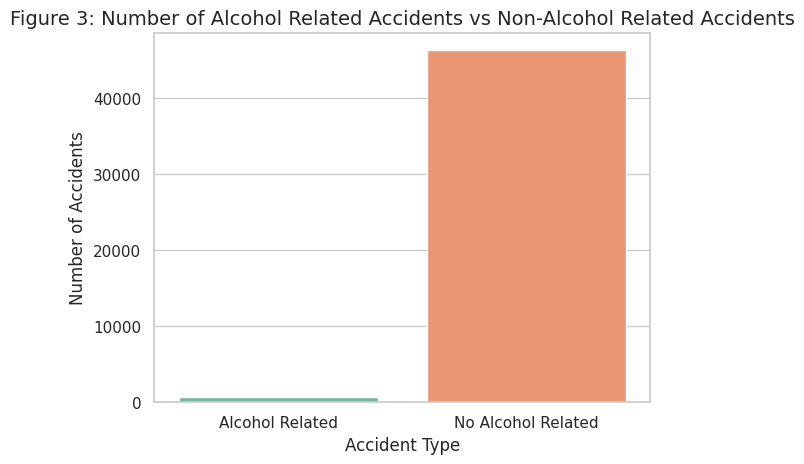

In [106]:
#Figu
balance_dict = {'Alcohol Related': 688, "No Alcohol Related": 46295}
label_balance = pd.DataFrame(balance_dict, index=[0])
sns.barplot(data=label_balance,palette='Set2')
plt.title('Figure 3: Number of Alcohol Related Accidents vs Non-Alcohol Related Accidents', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Accident Type', fontsize=12);

For downsampling we downsampled the majority class in the training set to a 1:1 ratio as it provided the best performance for our models. After downsampling our training data we used 4 different models to try and predict whether an accident was alcohol related. We used a logistic regression, random forest, SVM, and a neural network. A neural network was tested because it is a common model used in predicting accident severity/fatalities(Shaik, et al 2021) and some studies also have used alcohol consumption as a feature in predicting accident severity(Sirikul et al 2021). Due to this we decided to include a neural network model in our analysis. Grid search was performed on each model and fitted with the downsampled training data. Grid search was optimized for recall as we wanted to capture as many alcohol related accidents as possible even if we misclassified many of the non alcohol related accidents as alcohol related. The recall for each model are given as follows:

<table style="border-collapse: collapse; width: 100%;">
  <caption style="caption-side: top; font-weight: bold; padding: 8px;">
    Figure 4: Table of Recall Values for models trained on 1:1 downsampled data
    </caption>
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 8px; text-align: left;">Model</th>
      <th style="border: 1px solid black; padding: 8px; text-align: center;">Class 0 Recall</th>
      <th style="border: 1px solid black; padding: 8px; text-align: center;">Class 1 Recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Logistic Regression</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.67</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.79</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Random Forest</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.66</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.68</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">SVM</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.67</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.74</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Neural Network</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.72</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.75</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Baseline</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">1.00</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.00</td>
    </tr>
  </tbody>
</table>

The next technique we tried was to adjust the class weights for each model using the class_weight=’balanced’ parameter in sklearn. This class weight defines how important each data point of each class is taken so the model will weight alcohol related crashes higher than in the previous models. The balanced parameter sets the class weight to be inversely proportional to how often the class appears in the data so this should help balance the model and prevent overfitting on the majority class. We ran this approach with all models from the previous section excluding the neural network as the neural network has no class_weight parameter in sklearn. These models were not trained on the downsampled dataset but on the original imbalanced training set with grid search to find the optimal hyperparameters for each model. The recall values for those are as follows:

<table style="border-collapse: collapse; width: 100%;">
  <caption style="caption-side: top; font-weight: bold; padding: 8px;">
    Figure 5: Table of Recall Values for models with balanced class weights
  </caption>
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 8px; text-align: left;">Model</th>
      <th style="border: 1px solid black; padding: 8px; text-align: center;">Class 0 Recall</th>
      <th style="border: 1px solid black; padding: 8px; text-align: center;">Class 1 Recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Logistic Regression</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.75</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.73</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Random Forest</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.81</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.63</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">SVM</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.74</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.72</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Baseline</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">1.00</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">0.00</td>
    </tr>
  </tbody>
</table>

Overall in both cases the best model with downsampling and with adjusting class weights was the logistic regression model. In both cases the logistic regression had the highest recall for class 1 which are our alcohol related accidents. The logistic regression trained on the downsampled data had the highest overall recall value at 0.79 and in general the models that were trained on the downsampled data achieved higher recall in general compared to the models where class weights were changed. A limitation of these models however is that the training set had to be downsampled down to a 1:1 ratio which throws away a lot of our data and also since the real world distribution of alcohol to non-alcohol related accidents isn’t 1:1 this could introduce some potential bias in the model as alcohol-related accidents are overrepresented in the downsampled training set. A limitation of all these models is that all models have very low precision values which means that they frequently misclassify non-alcohol related as alcohol related.This is most likely due to our features not being able to fully capture the relationship with the response variable. Certain information about driver demographics such as age or more cases of fatal accidents could help as 30% of accident fatalities were related to drunk driving so adding whether the accident was fatal could be another predictor(Masterson & Smith, 2019). With these limitation we generally prefer the adjusting class weights approach as it avoids throwing out valid data and training on all non alcohol-related accidents while still achieving similar scores to the downsampled models. Because of this we felt that the best model for this question was the logistic regression with balanced class weights.




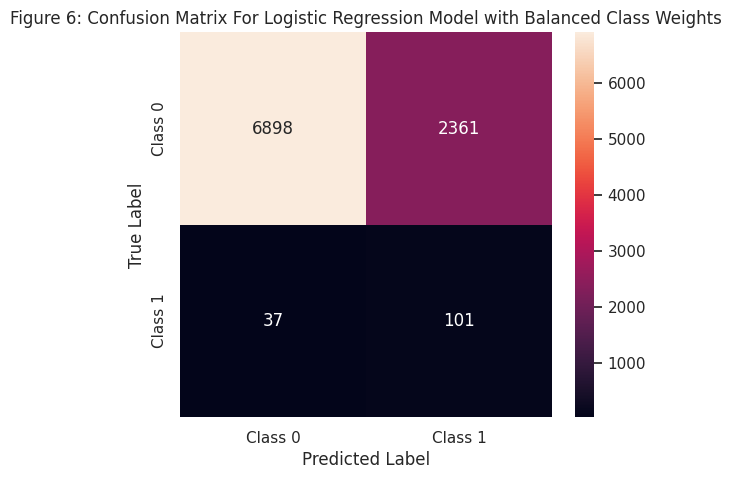

In [109]:
conf_matrix = np.array([[6898, 2361], 
                        [  37,  101]])

# Class labels
labels = ["Class 0", "Class 1"]

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

# Add labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Figure 6: Confusion Matrix For Logistic Regression Model with Balanced Class Weights");

Our second research question had to deal with predicting ridership days. In order to predict whether a day was a high subway ridership day (defined as above the median ridership), we first cleaned the data as mentioned in the previous section. The daily accident and weather summary statistics were then merged with the subway ridership counts for each day. Finally, we made a new binary target variable column called “High_Ridership” that marks a day as 1 if the ridership is above the median and 0 otherwise. 

Next, we examined each feature to see how it relates to the target and the other feature variables. Based on the correlation matrix (Figure 5), we found that Accident_Count had a strong positive relationship with High_Ridership (r = 0.67) and that Temperature showed a moderate positive relationship  (r= 0.41); however, precipitation and humidity showed very little correlation with high ridership, with a correlation coefficient of 0.017 and 0.036 respectively. To ensure none of our feature variables were too similar with one another, we computed the VIFs of each (Figure 6), and found that their VIFs were around 1, so there were no problems with multicollinearity. 

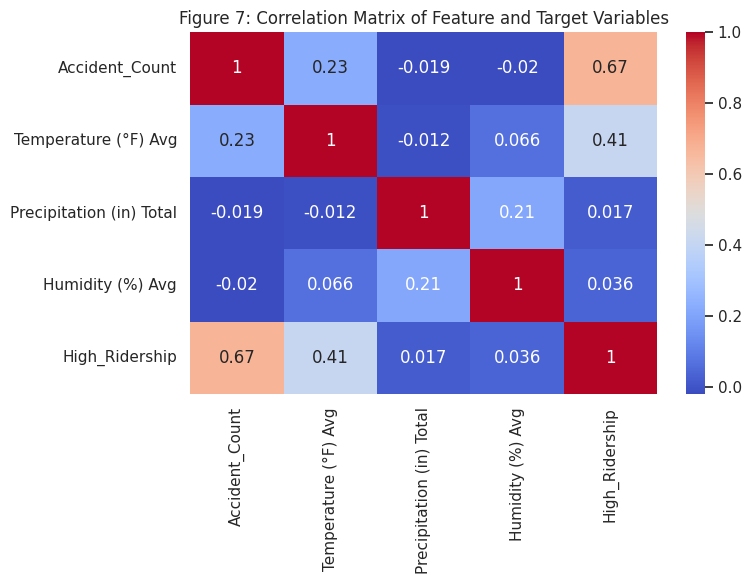

In [118]:
mta = pd.read_csv('MTA_Daily_Ridership.csv')
weather = pd.read_csv('NYC_weather_data_Jan-Aug2020.csv')
accidents = pd.read_csv('NYC Accidents 2020.csv')

# ---------------------------
# Data Preparation and Aggregation
# ---------------------------
# Convert date columns to datetime
accidents['CRASH DATE'] = pd.to_datetime(accidents['CRASH DATE'])
weather['Date'] = pd.to_datetime(weather['Date'])
mta['Date'] = pd.to_datetime(mta['Date'])

# Aggregate accident data by day: count accidents per day
daily_accidents = accidents.groupby(accidents['CRASH DATE'].dt.date).size().reset_index(name='Accident_Count')
daily_accidents['Date'] = pd.to_datetime(daily_accidents['CRASH DATE'])
daily_accidents.drop('CRASH DATE', axis=1, inplace=True)

# Aggregate weather data by day.
# (If multiple records per day exist, compute mean for temperature/humidity and sum for precipitation.)
daily_weather = weather.groupby(weather['Date'].dt.date).agg({
    'Temperature (°F) Avg': 'mean',
    'Precipitation (in) Total': 'sum',
    'Humidity (%) Avg': 'mean'
}).reset_index()
daily_weather['Date'] = pd.to_datetime(daily_weather['Date'])

# Use MTA data as provided (assumed daily records)
daily_mta = mta[['Date', 'Subways: Total Estimated Ridership']].copy()

# Merge datasets on Date (inner join ensures all three datasets share the same days)
df_daily = daily_accidents.merge(daily_weather, on='Date', how='inner')
df_daily = df_daily.merge(daily_mta, on='Date', how='inner')

# Create a binary target variable: High_Ridership = 1 if daily ridership is above the median; else 0.
median_ridership = df_daily['Subways: Total Estimated Ridership'].median()
df_daily['High_Ridership'] = (df_daily['Subways: Total Estimated Ridership'] > median_ridership).astype(int)

# ---------------------------
# Exploratory Visualizations
# ---------------------------
# 1. Correlation Matrix to examine relationships between features and the target
features = ['Accident_Count', 'Temperature (°F) Avg', 'Precipitation (in) Total', 'Humidity (%) Avg']
corr_matrix = df_daily[features + ['High_Ridership']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Figure 7: Correlation Matrix of Feature and Target Variables")
plt.tight_layout()
plt.show()

<table style="border-collapse: collapse; width: 100%;">
  <caption style="caption-side: top; font-weight: bold; padding: 8px;">
    Figure 8: Variance Inflation Factor (VIF) Table
  </caption>
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 8px; text-align: left;">Feature</th>
      <th style="border: 1px solid black; padding: 8px; text-align: center;">VIF</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">const</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">37.25</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Accident_Count</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">1.05</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Temperature (°F) Avg</td>
      <td style="border: 1px solid black; padding: 8px; text-align: center;">1.06</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Precipitation (in) Total</td>
      <td style="border: 1px solid black; padding: 8px;text-align: center;">1.05</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;">Humidity (%) Avg</td>
      <td style="border: 1px solid black; padding: 8px;text-align: center;">1.05</td>
    </tr>
  </tbody>
</table>
      

We then standardized the four features, split the data into a 70% training set and 30% test set, and initially trained a baseline model that always predicted the most common class in the training set, which in this case was the high ridership class (random_state=42). We also trained three main classifiers, including a random forest classifier (RFC), a support vector machine (SVM) with a radial basis function (RBF) kernel, and a logistic regression (LR) model. The RFC had the decision tree limited to just 5 levels (max_depth=5) to avoid overfitting and 100 trees (n_estimators=100) to ensure good accuracy without slowing down runtime. The RBF kernel was chosen for our SVM since the link between the features and riderships was not perfectly linear, so an RBF kernel fits the nonlinear patterns well. Finally, our LR had up to 1,000 iterations (max_iter=1000) so that the model has enough steps to finish finding the best line and avoid stopping too soon. 

After generating confusion matrices for each model, we found that all three greatly outperform the baseline model (Figure 7), capturing much more true low ridership days (TN) and less false high ridership days (FP), with the RFC and LR performing slightly better than the SVM. We also see that no model captures false low ridership days (FN), hence why it is omitted from Figure 7. Furthermore, all three of the main classifiers outperform the baseline model in precision and recall for low (0) and high (1) ridership days (Figure 8). For instance, all three achieved 100% precision on low ridership days, so none mark a true high ridership day as low. For high ridership days, the SVM achieved 71% precision while the RFC and LR performed somewhat better, achieving 73% precision. 

On the other hand, the SVM achieved 68% recall for low ridership days, whereas the RFC and LR achieved 71% recall, so they mark slightly more of the low ridership days correctly. For high ridership days, all three achieved 100% recall, so none never miss any high-ridership days.

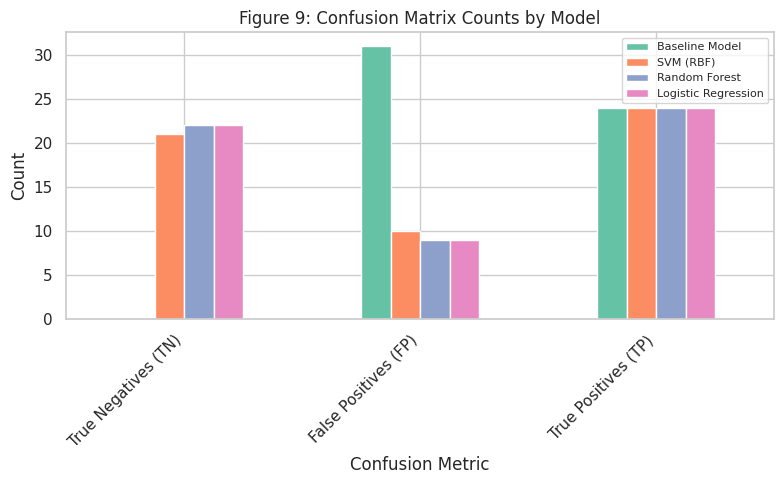

In [112]:
# Construct confusion matrix counts without the FN row
cm_data = {
    'Baseline Model':     [0, 31, 24],
    'SVM (RBF)':           [21, 10, 24],
    'Random Forest':       [22,  9, 24],
    'Logistic Regression': [22,  9, 24]
}
cm_index = [
    'True Negatives (TN)',
    'False Positives (FP)',
    'True Positives (TP)'
]

# Create DataFrame
df_cm = pd.DataFrame(cm_data, index=cm_index)

# Set seaborn style and choose a palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(df_cm.columns))

# Plot confusion matrix counts by model with seaborn palette
ax = df_cm.plot(kind='bar', color=palette, figsize=(8, 5))
ax.set_title('Figure 9: Confusion Matrix Counts by Model')
ax.set_ylabel('Count')
ax.set_xlabel('Confusion Metric')
plt.xticks(rotation=45, ha='right')

# Move legend to the left outside the plot with reduced font size
ax.legend(loc='upper right', prop={'size': 8})

plt.tight_layout()
plt.show()

Figure 8: Classification Report Metrics by Model

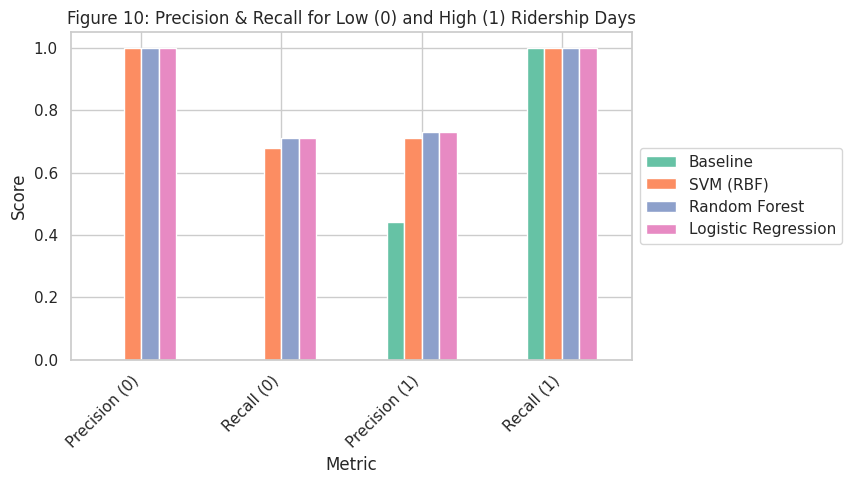

In [115]:
# Data: Precision and Recall for class 0 and class 1
data = {
    'Metric': ['Precision (0)', 'Recall (0)', 'Precision (1)', 'Recall (1)'],
    'Baseline':             [0.00, 0.00, 0.44, 1.00],
    'SVM (RBF)':            [1.00, 0.68, 0.71, 1.00],
    'Random Forest':        [1.00, 0.71, 0.73, 1.00],
    'Logistic Regression':  [1.00, 0.71, 0.73, 1.00]
}

# Create DataFrame
df = pd.DataFrame(data).set_index('Metric')

# Set seaborn theme and pick a color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(df.columns))

# Plot grouped bar chart with custom palette
ax = df.plot(kind='bar', figsize=(8, 5), color=palette)
ax.set_title('Figure 10: Precision & Recall for Low (0) and High (1) Ridership Days')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
plt.xticks(rotation=45, ha='right')

# Move legend outside to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Make room on the right
plt.tight_layout()
plt.subplots_adjust(right=0.8)

plt.show()

Overall, the models with the best fit are the random forest and logistic regression, both achieving the highest accuracy of 84% and having the strongest balance between precision and recall for low and high ridership days. 

## Conclusion
Our project set out to investigate the relationship in NYC accident, weather, and MTA ridership data over a 6-month period in 2020. We focused on two primary questions: whether it was possible to predict alcohol-related crashes based on time of day, day of the week, borough, type of vehicle, and the severity of the crash, and also whether daily weather and accident data could predict high or low ridership. These questions were designed with the goal of discovering valuable insights that could help us improve city planning and public safety, that could also be transferable to other metropolitan areas.

In the subway ridership prediction task, all three classifiers—random forest, SVM, and logistic regression—outperformed the baseline model, with the random forest and logistic regression models achieving the best overall performance. Both reached an accuracy of 84% and showed balance between precision and recall, correctly identifying high and low ridership days with little error. These results suggest that accident and weather features are effective predictors of daily subway ridership. In predicting alcohol-related accidents, our models initially struggled due to  class imbalance, with all models simply predicting non-alcohol-related crashes. After applying downsampling and adjusting class weights, logistic regression emerged as the strongest model, particularly when class weights were balanced, as it maintained more data while achieving the highest recall for alcohol-related crashes. While downsampling improved recall slightly more, it introduced potential bias, so the logistic regression with balanced class weights was ultimately the most reliable model for identifying alcohol-related incidents.

The implications of our findings are important for both public safety and transit planning. For alcohol-related accidents, our results show that even simple models like logistic regression can meaningfully predict risk when adjustments for class imbalance are made. This suggests that city agencies could use routinely collected crash data to better target interventions, such as heightened patrols during late-night hours in certain boroughs. Similarly the ability to predict high subway ridership days based on accident and weather data could help the MTA or city planners optimize staffing, or resources on data with expected high ridership. To contextualize our findings within existing research, we referenced the study by DiMaggio at BMC (2016), which examined the association between alcohol outlets and alcohol-related pedestrian and bicyclist injuries in New York City. This highlights the importance of considering environmental factors, such as the density of alcohol-serving establishments.

Future research could include looking into additional features, like holidays, or special events, that could further improve our predictive accuracy. A limitation of our analysis is that our time period lasted during the COVID outbreak, so some of our transportation data was lower than it was both before and after the pandemic. Future work could benefit from including a broader time span to better capture trends. Additionally, although downsampling and adjusting class weights improved model performance for alcohol-related accidents, these methods still have drawbacks; downsampling reduces data availability, while class weighting may not fully solve the imbalance issue.

## References
American Meteorological Society. “Rain - Glossary of Meteorology.” Glossary of Meteorology, Mar. 2024, glossary.ametsoc.org/wiki/Rain.

Balk, Tim. “78% Say NYC Subway Not Safe at Night, 24-Point Bump since 2017: Poll.” 
New York Daily News, 19 Mar. 2024, 
www.nydailynews.com/2024/03/19/78-say-nycsubway-not-safe-at-night-24-point-bump-since-2017-poll.

DiMaggio, Charles, et al. “Spatial Analysis of the Association of Alcohol Outlets and Alcohol-Related Pedestrian/Bicyclist Injuries in New York City.” Injury Epidemiology, vol. 3, no. 1, 4 Apr. 2016, https://doi.org/10.1186/s40621-016-0076-5. Accessed 24 Sept. 2019. 

Encyclopedia Britannica, Encyclopedia Britannica, inc., www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc. Accessed 28 Apr. 2025. 

Masterson, Les, and Kelly  Anne Smith. “Drunk Driving Statistics 2025.” Edited by Patricia Louis, Forbes, Forbes Magazine, 3 Jan. 2025, www.forbes.com/advisor/car-insurance/drunk-driving-statistics/.

Shaik, Md. Ebrahim, et al. “A review on neural network techniques for the prediction of Road Traffic Accident severity.” Asian Transport Studies, vol. 7, 2021, p. 100040, https://doi.org/10.1016/j.eastsj.2021.100040. 

Sirikul, Wachiranun, et al. “Mortality-risk prediction model from road-traffic injury in Drunk Drivers: Machine Learning Approach.” International Journal of Environmental Research and Public Health, vol. 18, no. 19, 8 Oct. 2021, p. 10540, https://doi.org/10.3390/ijerph181910540. 